# Exploratory Data Analysis: Students Performance in Exams

**Author:** [Grace Tulsi](https://github.com/gracetulsi)  
**Date:** February 2026  
**Purpose:** Perform exploratory data analysis (EDA) on a dataset examining factors associated with student performance in math, reading, and writing.

As a Learning Center Coordinator and math instructor at a community college, I chose this dataset because understanding the factors that influence student success is central to my work. This analysis explores how socioeconomic status, test preparation, gender, and parental education relate to student exam scores.

## Dataset Description

**Dataset:** Students Performance in Exams  
**Source:** [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)  
**Records:** 1,000

| Column | Description | Type |
|--------|-------------|------|
| gender | Male or female | Categorical |
| race/ethnicity | Student group (A, B, C, D, E) | Categorical |
| parental level of education | Highest education level of parent | Categorical |
| lunch | Standard or free/reduced program | Categorical |
| test preparation course | Completed or none | Categorical |
| math score | Math exam score (0-100) | Numeric |
| reading score | Reading exam score (0-100) | Numeric |
| writing score | Writing exam score (0-100) | Numeric |

In [198]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 1: Data Acquisition

Load the dataset from a local CSV file using pandas and pathlib.

In [199]:
from pathlib import Path

# Load the dataset
df = pd.read_csv(Path("data/raw/StudentsPerformance.csv"))

# Inspect first rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 2: Initial Data Inspection

Inspect the structure of the dataset, confirm data types, and check for missing values and duplicates.

In [200]:
# Display first 10 rows
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [201]:
# Check the shape (rows, columns) and data types
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print()
print(df.dtypes)

Shape: 1000 rows, 8 columns

gender                           str
race/ethnicity                   str
parental level of education      str
lunch                            str
test preparation course          str
math score                     int64
reading score                  int64
writing score                  int64
dtype: object


### Check for Missing Values and Duplicates

In [202]:
# Check for missing values
print(df.isnull().sum())
print()

# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicate rows: 0


## Step 3: Initial Descriptive Statistics

Generate summary statistics for numerical and categorical columns separately to understand the dataset's central tendencies, spread, and category distributions.

In [203]:
# Display summary statistics for numerical columns
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Observations: Numerical Summary

All three score columns have 1,000 entries with no missing values. Average scores are similar across subjects (math: 66, reading: 69, writing: 68). The standard deviations are around 15 for all three, indicating similar spread. Math has the lowest minimum score (0), while reading and writing minimums are higher (17 and 10).

In [204]:
# Describe only categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'string']).columns
df[categorical_cols].describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


### Observations: Categorical Summary

The categorical summary shows five non-numeric columns, each with 1,000 complete entries (no missing values).

- **gender** has 2 unique values, with female as the most frequent (518 of 1,000).
- **race/ethnicity** has 5 groups, with group C being the largest at 319 students.
- **parental level of education** is the most varied, with 6 unique levels. "Some college" is the most common (226).
- **lunch** has 2 categories, with "standard" as the majority (645), meaning most students were not on the free/reduced lunch program.
- **test preparation course** has 2 categories, and most students (642) did not complete a prep course.

These distributions suggest the dataset is slightly skewed toward female students and heavily skewed toward students who did not take a test preparation course. This will be worth exploring further when comparing scores across groups.

## Step 4: Initial Data Distribution for Numerical Columns

Visualize the distribution of each numerical column using histograms to identify shape, spread, and potential outliers.

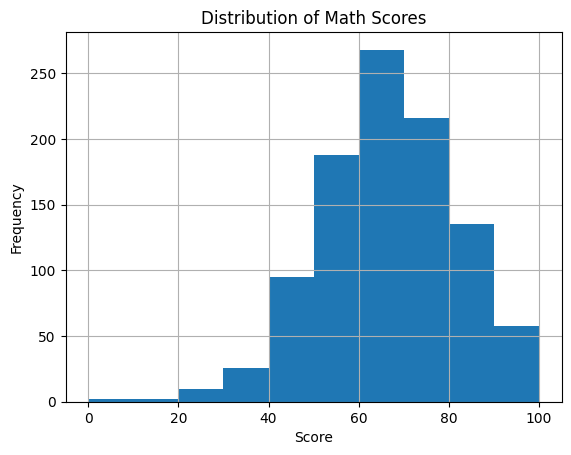

In [205]:
# Inspect histogram by numerical column
df['math score'].hist()
plt.title('Distribution of Math Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

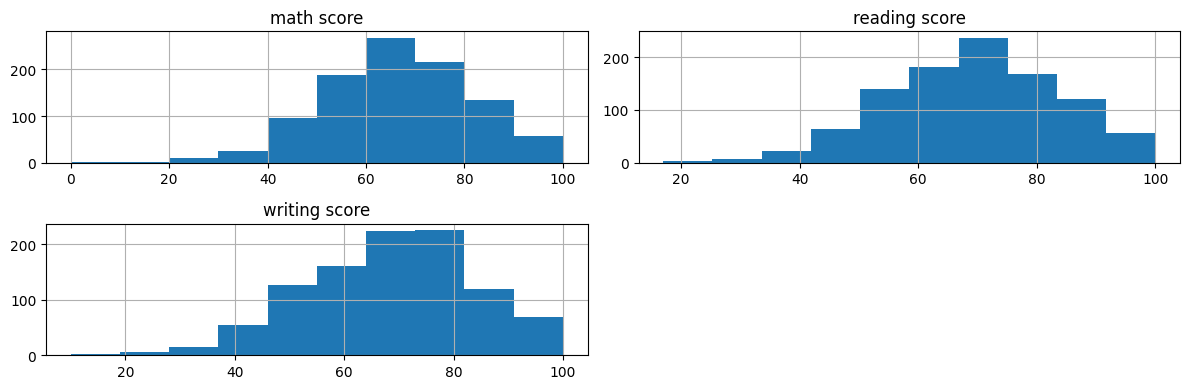

In [206]:
# Inspect histograms for all numerical columns
df.hist(figsize=(12, 4))
plt.tight_layout()
plt.show()

### Observations: Numerical Distributions

All three score distributions are roughly normal, centered around 60-80. Math scores have a slight left skew with a few students scoring near 0. Reading and writing scores show similar patterns with slightly higher concentrations in the 70-80 range.

## Step 5: Initial Data Distribution for Categorical Columns

Visualize the frequency distribution of each categorical column using count plots to identify imbalances or patterns.

In [207]:
# Inspect value counts for a specific categorical column
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

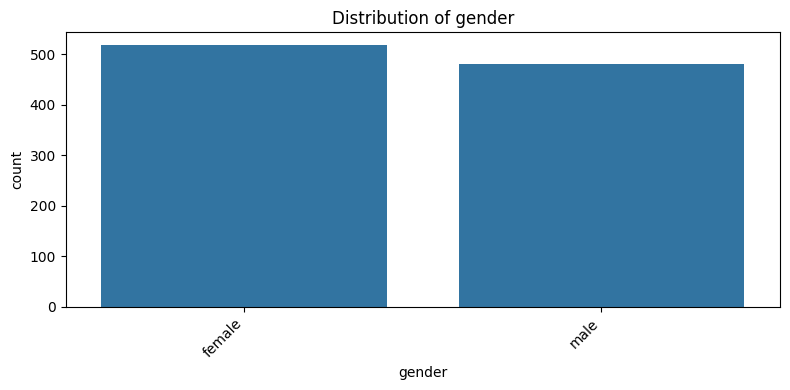

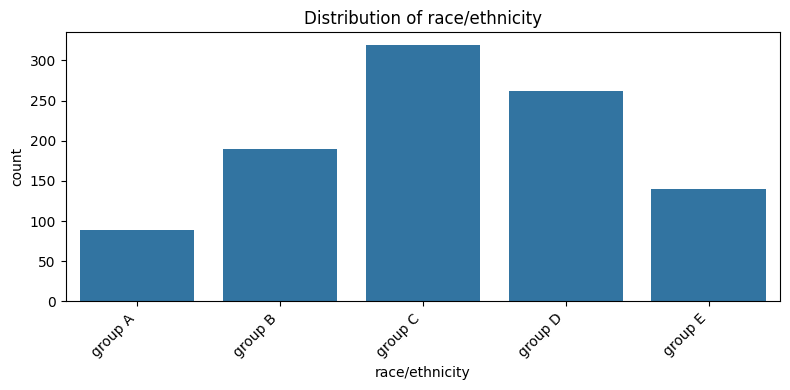

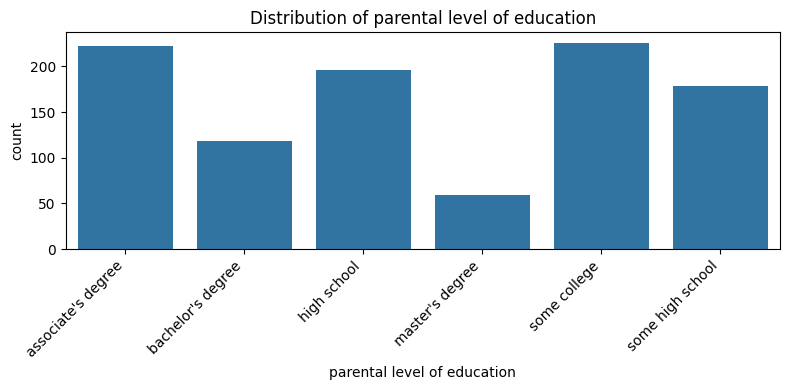

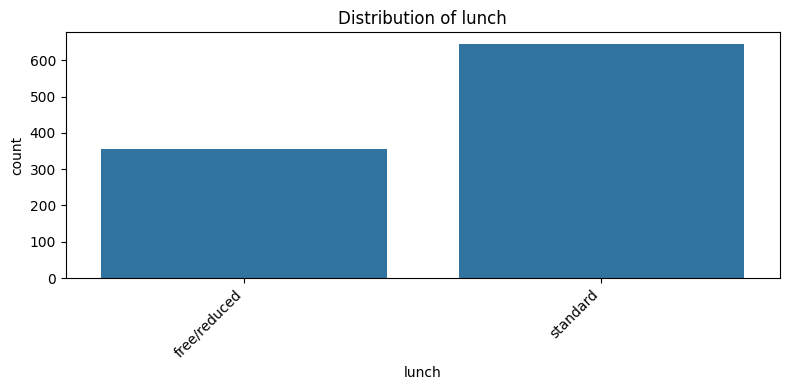

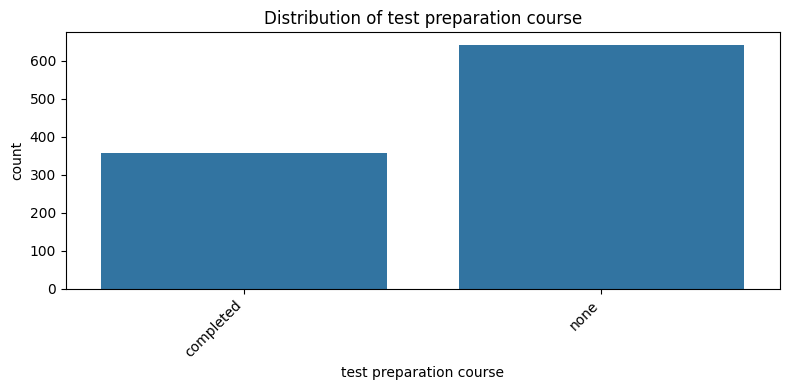

In [208]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category', 'string']).columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=sorted(df[col].unique()))
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Show all plots
plt.show()

### Observations: Categorical Distributions

- **gender** is fairly balanced, with a slight majority of female students (518 vs. 482 male).
- **race/ethnicity** is unevenly distributed. Group C is the largest (~319), followed by group D (~262). Group A is the smallest with fewer than 100 students.
- **parental level of education** varies across six levels. "Some college" and "associate's degree" are the most common, while "master's degree" is the least represented (~59). Most parents in the dataset did not complete a four-year degree.
- **lunch** is skewed toward "standard" (645), meaning most students were not on the free/reduced lunch program.
- **test preparation course** is also skewed — nearly two-thirds of students (642) did not complete a prep course. This could be worth exploring further to see if completing the course is associated with higher scores.

## Step 6: Initial Data Transformation and Feature Engineering

Renamed all columns to clean snake_case for consistency and easier referencing. Shortened longer names like "test preparation course" to "test_prep" and "parental level of education" to "parent_ed." Added a new "average_score" column that calculates the mean of each student's math, reading, and writing scores, providing a single overall performance metric for analysis.

In [209]:
# Rename columns to clean snake_case
df.rename(columns={
    'test preparation course': 'test_prep',
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parent_ed',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
}, inplace=True)

# Add average score column
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1).round(2)

# Verify changes
df.head()

,gender,race_ethnicity,parent_ed,lunch,test_prep,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


## Step 7: Initial Visualizations

### 7.1 Correlation Heatmap

**Goal:** Identify which variables are most strongly related to student scores. Encode binary categorical variables (gender, lunch, test prep) as 0/1 to include them alongside numeric scores in the correlation analysis.

**Chart Type:** Correlation matrix followed by a heatmap using sns.heatmap().

In [210]:
# Encode binary categorical columns for correlation analysis
df['gender_female'] = (df['gender'] == 'female').astype(int)
df['lunch_standard'] = (df['lunch'] == 'standard').astype(int)
df['test_prep_completed'] = (df['test_prep'] == 'completed').astype(int)

In [211]:
# Display the correlation matrix
df.corr(numeric_only=True).round(2)

,math_score,reading_score,writing_score,average_score,gender_female,lunch_standard,test_prep_completed
math_score,1.00,0.82,0.80,0.92,-0.17,0.35,0.18
reading_score,0.82,1.00,0.95,0.97,0.24,0.23,0.24
writing_score,0.80,0.95,1.00,0.97,0.30,0.25,0.31
average_score,0.92,0.97,0.97,1.00,0.13,0.29,0.26
gender_female,-0.17,0.24,0.30,0.13,1.00,-0.02,-0.01
lunch_standard,0.35,0.23,0.25,0.29,-0.02,1.00,-0.02
test_prep_completed,0.18,0.24,0.31,0.26,-0.01,-0.02,1.00


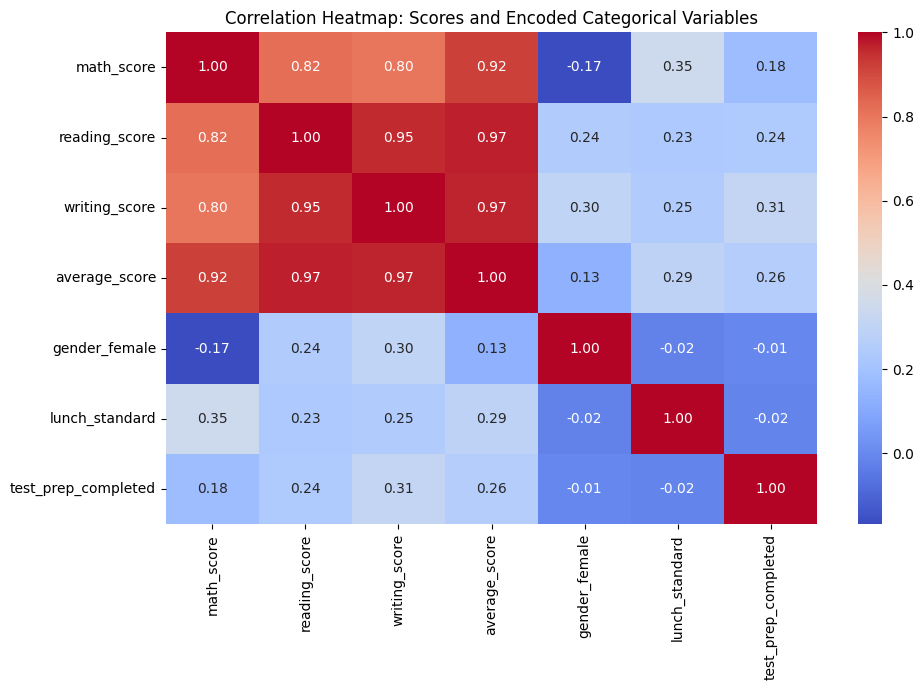

In [212]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Scores and Encoded Categorical Variables')
plt.tight_layout()
plt.show()

### Observations: Correlation Matrix

The three score columns are highly correlated with each other (0.80–0.95), as expected. Reading and writing show the strongest relationship (0.95), while math is slightly less correlated with both (0.80–0.82) and with average score (0.92 vs. 0.97). This suggests math scores may be more variable, have outliers, or are influenced by different factors than reading and writing.

**Key findings from the encoded categorical variables:**

- **Gender:** Being female is negatively correlated with math scores (-0.17) but positively correlated with reading (0.24) and writing (0.30). This is a notable pattern worth exploring further.
- **Lunch (socioeconomic status):** Standard lunch shows the strongest categorical correlation with math scores (0.35), and a smaller but still positive correlation with reading (0.23) and writing (0.25). Socioeconomic status appears to have a greater impact on math performance than on the other subjects.
- **Test prep:** Completing a test prep course has the strongest positive correlation with writing (0.31), followed by reading (0.24), with math benefiting least (0.18). Interestingly, test prep's impact on writing and reading differs noticeably from the pattern seen with socioeconomic status, suggesting these factors may influence performance through different mechanisms.
- **Between categorical variables:** Gender, lunch, and test prep are essentially uncorrelated with each other (all near 0), meaning these are independent factors that each contribute separately to student performance.
- **Surprising finding:** Test prep completion and lunch type (SES) are essentially uncorrelated (-0.02). Intuitively, one might expect lower SES students to have less access to test prep, but this data suggests the prep course was equally accessible across income levels — possibly a free or school-provided program. Analytically, this independence is valuable because it means SES and test prep each explain different aspects of student performance rather than overlapping, allowing us to isolate their individual effects in the visualizations that follow.

### 7.2 Scores by Lunch Type (Socioeconomic Status)

**Goal:** Explore whether socioeconomic status (using lunch type as a proxy) is associated with differences in student performance across all three subjects.

**Chart Type:** Grouped boxplot using sns.boxplot().

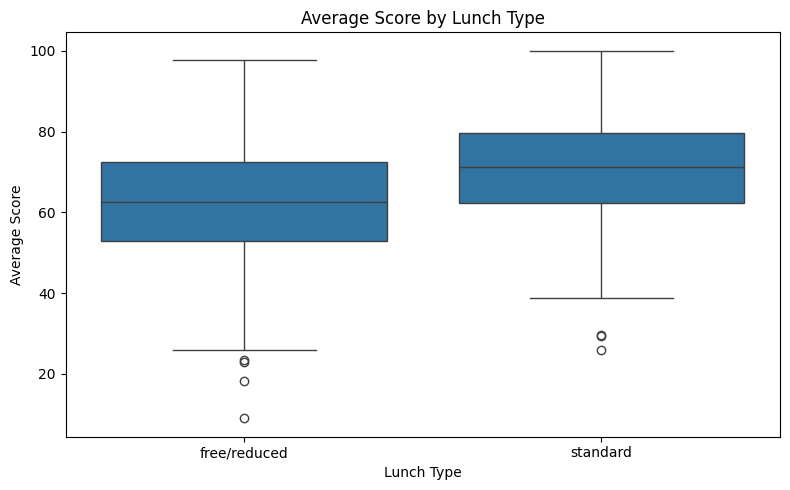

In [213]:
# Boxplot of average score by lunch type
plt.figure(figsize=(8, 5))
sns.boxplot(x='lunch', y='average_score', data=df, order=['free/reduced', 'standard'])
plt.title('Average Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

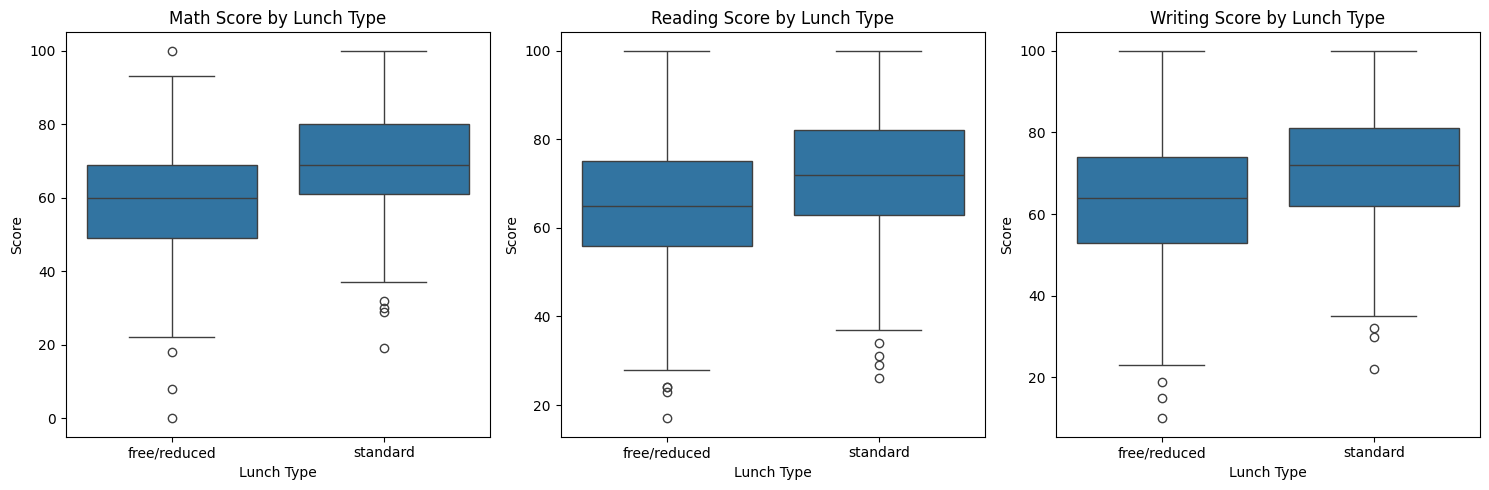

In [214]:
# Boxplots for each subject by lunch type
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    sns.boxplot(x='lunch', y=col, data=df, order=['free/reduced', 'standard'], ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").title()} by Lunch Type')
    axes[i].set_xlabel('Lunch Type')
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.show()

### Observations: Scores by Lunch Type

The boxplots confirm and visualize what the correlation matrix suggested — lunch type (as a proxy for socioeconomic status) is strongly associated with student performance.

- **Average score:** The median for standard lunch students (~71) sits near the upper quartile (Q3) of free/reduced lunch students (~62), indicating a substantial performance gap.
- **Math shows the largest gap:** The median math score for standard lunch students aligns closely with the Q3 for free/reduced students. This is consistent with the correlation matrix, where lunch had its strongest correlation with math (0.35).
- **Reading and writing** show similar patterns with slightly smaller gaps, again consistent with their lower correlations (0.23 and 0.25).
- **Outliers** appear in both groups across all subjects, with more low-scoring outliers visible in the free/reduced group.

As an educator, this is a sobering but important finding — socioeconomic factors appear to have a meaningful association with student performance, particularly in math.

### 7.3 Scores by Test Preparation Course

**Goal:** Explore whether completing a test preparation course is associated with higher scores, and whether the effect differs across subjects.

**Chart Type:** Grouped boxplots using sns.boxplot().

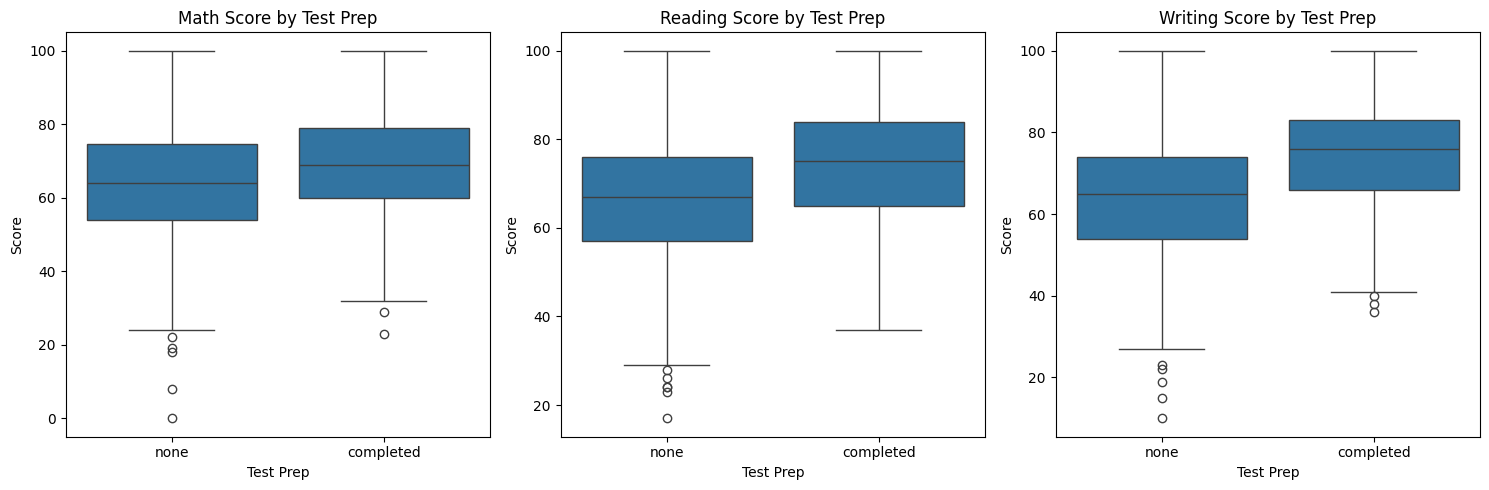

In [215]:
# Boxplots for each subject by test prep status
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    sns.boxplot(x='test_prep', y=col, data=df, order=['none', 'completed'], ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").title()} by Test Prep')
    axes[i].set_xlabel('Test Prep')
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.show()

### Observations: Scores by Test Prep

The boxplots confirm the correlation matrix findings — completing a test prep course is associated with higher scores, but the effect varies by subject.

- **Writing shows the largest gap:** The median for students who completed test prep aligns closely with the Q3 of those who did not, similar to the pattern seen with lunch type and math scores. This is consistent with test prep's strongest correlation being with writing (0.31).
- **Reading shows a clear benefit** as well, with a noticeable upward shift in the entire distribution for students who completed the course (correlation: 0.24).
- **Math benefits the least** from test prep. The distributions overlap considerably, consistent with its weaker correlation (0.18).
- **Outliers** are more frequent in the "none" group across all three subjects, suggesting students who skip test prep are more likely to score very low.

An interesting contrast with the lunch findings: socioeconomic status has its strongest association with math, while test prep has its strongest association with writing. This suggests these factors may influence student performance through different pathways — a finding worth investigating further.

Since test prep shows the weakest association with math scores (0.18) compared to writing (0.31) and reading (0.24), short-term test preparation alone may not be enough to close gaps in math performance. This could highlight the importance of sustained, ongoing math support — such as tutoring, learning center resources, and consistent classroom intervention — rather than relying on a single prep course to improve outcomes.

### 7.4 Scores by Gender

**Goal:** Explore how gender relates to performance across subjects, given that the correlation matrix showed a negative association with math but positive associations with reading and writing.

**Chart Type:** Grouped boxplots using sns.boxplot().

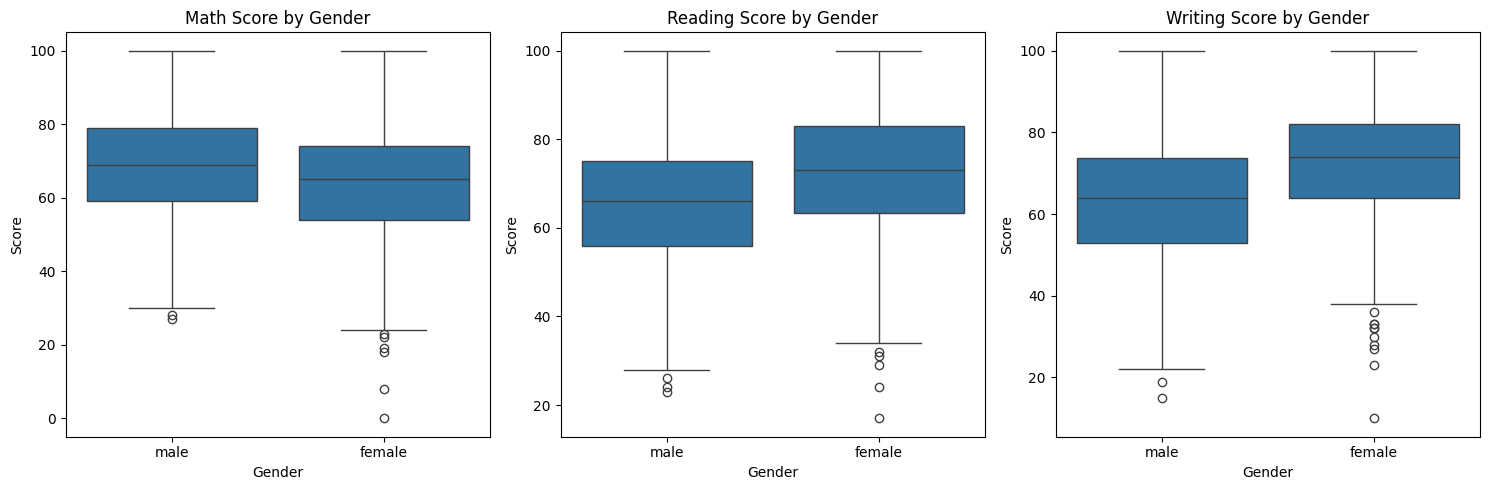

In [216]:
# Boxplots for each subject by gender
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    sns.boxplot(x='gender', y=col, data=df, order=['male', 'female'], ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").title()} by Gender')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.show()

### Observations: Scores by Gender

The boxplots confirm the gender pattern identified in the correlation matrix — the relationship between gender and scores flips direction depending on the subject.

- **Math:** Males score noticeably higher, with a higher median and Q1. The female distribution shifts downward, consistent with the negative correlation (-0.17).
- **Reading:** The pattern reverses — females outperform males with a visibly higher median and tighter upper range, consistent with the positive correlation (0.24).
- **Writing:** Females show the strongest advantage here, with the largest upward shift in the distribution (correlation: 0.30).
- **Outliers:** Across all three subjects, female students show notably more low-scoring outliers than males. This is a concerning pattern that may warrant further investigation into what factors put some female students at risk for very low performance.

These patterns are consistent with well-documented research in education showing gender-based performance gaps that vary by subject. Decades of research suggest that factors such as stereotype threat, historical underrepresentation of women in STEM, and differing societal expectations around literacy and mathematics may contribute to these disparities. Importantly, this data cannot establish causation — but the pattern underscores the need for equitable support across subjects for all students.

### 7.5 Scores by Parental Education Level

**Goal:** Explore whether parental education level is associated with student performance, and investigate whether parent education and socioeconomic status (lunch type) or test prep are related.

**Chart Type:** Boxplot using sns.boxplot() and crosstab using pd.crosstab().

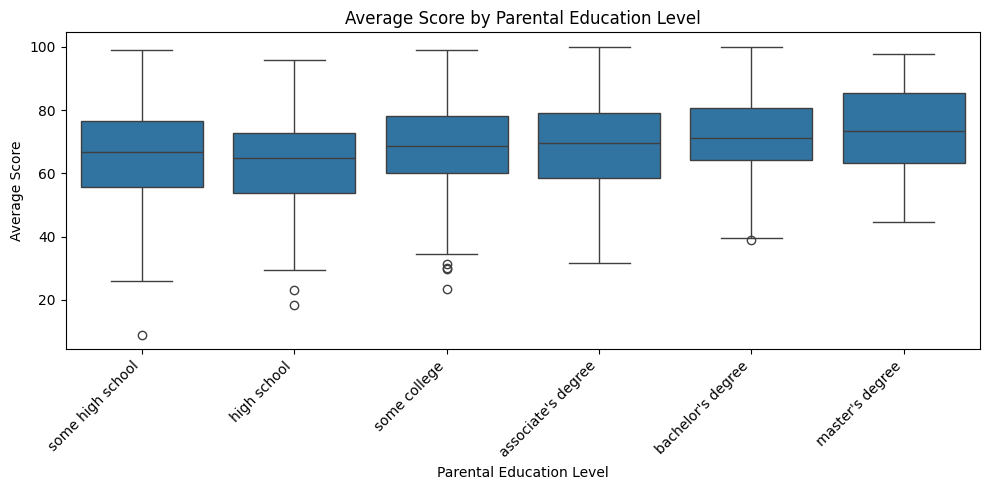

In [217]:
# Boxplot of average score by parental education level
plt.figure(figsize=(10, 5))
sns.boxplot(x='parent_ed', y='average_score', data=df,
            order=["some high school", "high school", "some college",
                   "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Average Score by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [218]:
# Crosstab of parental education and lunch type (SES)
ct_lunch = pd.crosstab(df['parent_ed'], df['lunch'], normalize='index').round(2)
ct_lunch.reindex(["some high school", "high school", "some college",
                   "associate's degree", "bachelor's degree", "master's degree"])

lunch,free/reduced,standard
parent_ed,,
some high school,0.34,0.66
high school,0.36,0.64
some college,0.35,0.65
associate's degree,0.35,0.65
bachelor's degree,0.37,0.63
master's degree,0.41,0.59


In [219]:
# Crosstab of parental education and test prep completion
ct_prep = pd.crosstab(df['parent_ed'], df['test_prep'], normalize='index').round(2)
ct_prep.reindex(["some high school", "high school", "some college",
                  "associate's degree", "bachelor's degree", "master's degree"])

test_prep,completed,none
parent_ed,,
some high school,0.43,0.57
high school,0.29,0.71
some college,0.34,0.66
associate's degree,0.37,0.63
bachelor's degree,0.39,0.61
master's degree,0.34,0.66


### Observations: Scores by Parental Education Level

**Boxplot findings:**
- There is a general upward trend in average scores as parental education increases, with master's degree students showing the highest median (~75) compared to some high school and high school (~65).
- However, the relationship is not perfectly linear. Some high school and master's degree groups both show the widest IQR, while mid-range education levels (high school, some college) have tighter distributions.
- The some high school group has the lowest outlier and the widest total range (whisker to whisker), while bachelor's and master's degree groups have higher floors with fewer extreme low scores.
- Outliers cluster in the lower education levels, suggesting students whose parents did not attend college may be more at risk for very low performance.

**Crosstab findings — Lunch (SES):**
- Surprisingly, lunch type proportions are nearly identical across all parent education levels (34–41% free/reduced), indicating that parental education and socioeconomic status are largely independent in this dataset.
- This is counterintuitive — one might expect higher education to correlate with higher income. This could reflect characteristics specific to this sample or dataset.

**Crosstab findings — Test Prep:**
- Test prep completion rates show no clear pattern by parent education. The highest completion rate belongs to "some high school" (43%) and the lowest to "high school" (29%).
- If parental education influenced access to test prep, we would expect a steady increase — but the data shows no such trend, confirming that test prep access appears independent of family background in this dataset.

**Overall:** The independence between parental education, socioeconomic status, and test prep completion is one of the most surprising findings in this analysis. It suggests that in this dataset, these factors each contribute to student performance through separate pathways rather than compounding together as we might expect in a real-world setting.

### 7.6 Scores by Race/Ethnicity

**Goal:** Explore whether race/ethnicity group is associated with differences in student performance across subjects.

**Chart Type:** Boxplot using sns.boxplot().

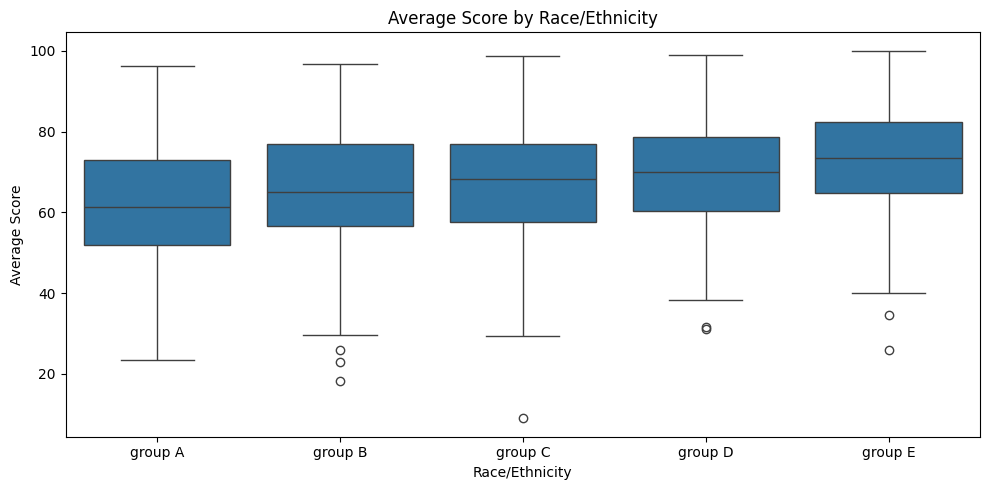

In [220]:
# Boxplot of average score by race/ethnicity
plt.figure(figsize=(10, 5))
sns.boxplot(x='race_ethnicity', y='average_score', data=df,
            order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.title('Average Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

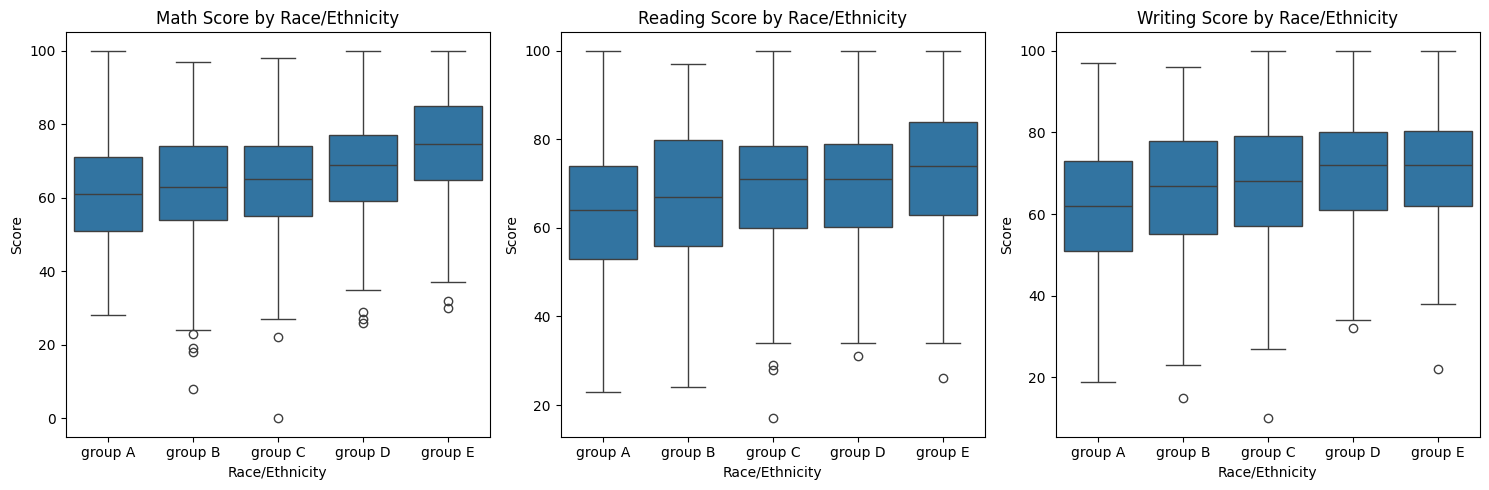

In [221]:
# Boxplots for each subject by race/ethnicity
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    sns.boxplot(x='race_ethnicity', y=col, data=df,
                order=['group A', 'group B', 'group C', 'group D', 'group E'], ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").title()} by Race/Ethnicity')
    axes[i].set_xlabel('Race/Ethnicity')
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.show()

### Observations: Scores by Race/Ethnicity

There is a general upward trend in scores from group A through group E, visible across all three subjects. Group E shows the highest median scores and group A the lowest. However, because these groups are anonymized, it is not possible to connect these patterns to specific racial or ethnic identities. Without additional context about what these groups represent, further interpretation would be speculative. The important takeaway is that group-level differences do exist in this dataset and would warrant further investigation with more detailed demographic information.

## Conclusion

This analysis uncovered several meaningful patterns in student performance — but more importantly, it revealed that the factors behind those patterns operate independently of one another.

Socioeconomic status, measured through lunch type, showed the strongest association with math scores, where the median for standard lunch students aligned with the 75th percentile of free/reduced students. Test preparation had a different fingerprint entirely — its strongest impact was on writing, not math — and surprisingly, completion rates were unrelated to SES or parental education. This suggests the test prep course in this dataset was equally accessible regardless of background, making it a potential equalizer rather than another advantage for higher-income students.

Gender differences flipped direction by subject: males outperformed in math while females outperformed in reading and writing, though female students showed more low-scoring outliers across all three subjects. Parental education showed a modest positive trend with scores, but was surprisingly independent of both SES and test prep — challenging the assumption that these factors compound together in predictable ways.

The most striking finding may be the independence itself. In a real-world setting, we might expect socioeconomic status, parental education, and test prep access to overlap and reinforce one another. In this dataset, they do not — each factor tells its own story. Because these factors are independent — free from multicollinearity — we can interpret each one's association with student performance without worrying that one is masking or inflating another's effect. This is particularly meaningful for the relationship between SES and test prep. Since test prep completion is unrelated to socioeconomic status in this dataset, and test prep is positively associated with scores (especially writing and reading), it suggests that ensuring test preparation remains accessible to all students — including those from lower socioeconomic backgrounds — could help offset the negative association between low SES and academic performance. The data tells us these are separate levers, and pulling one does not depend on the other.